In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os, warnings, random
import matplotlib.pyplot as plt
import csv


# Load your dataset
dataset = pd.read_csv('./data/cleaned_merged_data.csv')
data = dataset.copy()

# Prepare features and labels
X = data.drop(columns=['Attack_Num']).values  # Features
y = data['Attack_Num'].values  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for feature reduction
pca = PCA(n_components=0.85)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [18]:
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)


Original Training Data Shape: (438257, 69)
Reduced Training Data Shape (PCA): (438257, 12)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00     26090
           2       1.00      1.00      1.00     26210
           3       1.00      1.00      1.00     26382
           4       1.00      1.00      1.00     13212
           5       1.00      1.00      1.00      3172
           6       1.00      1.00      1.00      3105
           7       1.00      1.00      1.00      2593
           8       1.00      1.00      1.00      2434
           9       0.99      1.00      1.00      2404
          10       1.00      0.99      1.00      1719
          11       1.00      0.99      0.99      1362
          12       1.00      0.99      1.00       869

    accuracy                           1.00    109565
   macro avg       1.00      1.00      1.00    109565
weighted avg       1.00      1.00      1.00    109565

Confusion Matrix:
[[   13     0     0     0     0     0 

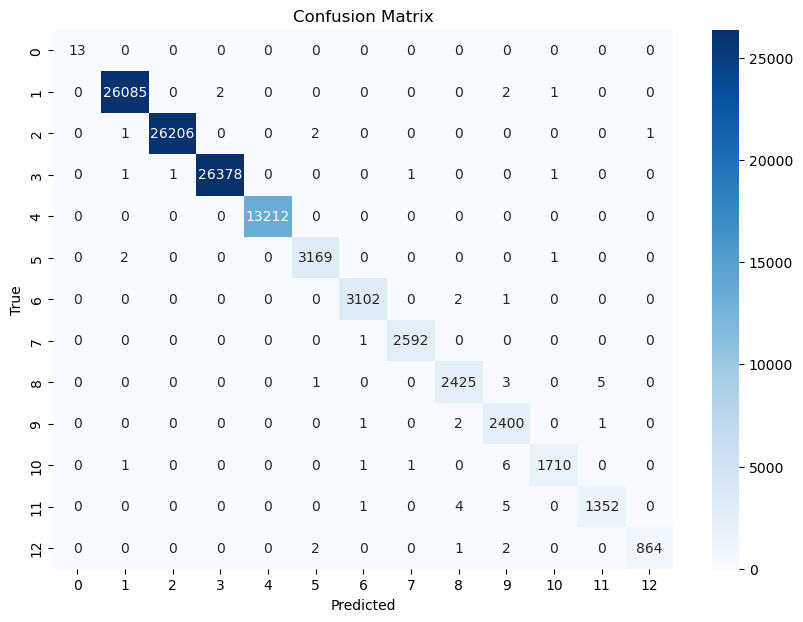

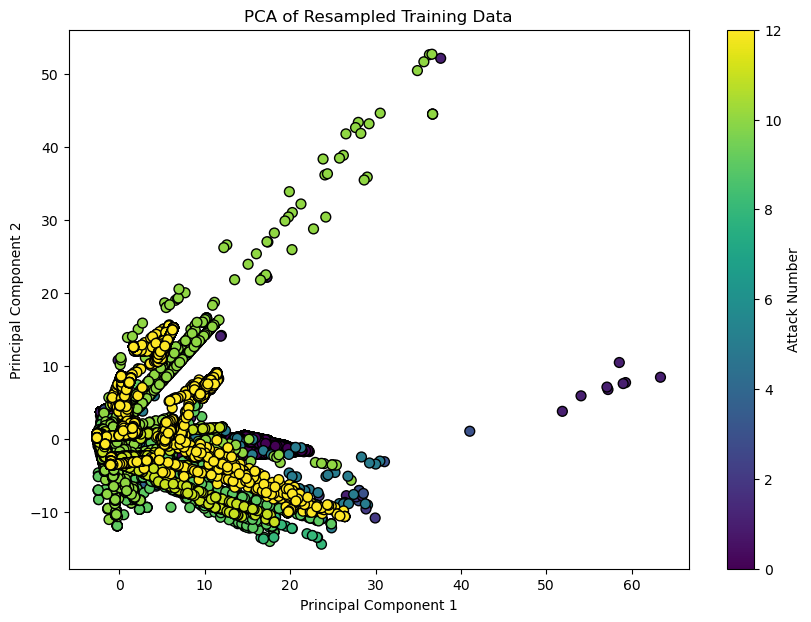

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
dataset = pd.read_csv('./data/cleaned_merged_data.csv')
data = dataset.copy()

# Prepare features and labels
X = data.drop(columns=['Attack_Num']).values  # Features
y = data['Attack_Num'].values  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the resampled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for feature reduction
pca = PCA(n_components=0.85)  # Retain 85% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize PCA results
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_resampled, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Resampled Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Attack Number')
plt.show()